# Tools of the Trade. Part 1

Welcome! In this workshop, we will introduce the basic functionalities of NumPy (Scipy), Pandas and Matplotlib and why we even care. There is a lot of ground to cover and this notebook is thought as a stand-alone document. That is to say, we will not have the time to cover everything in here, but the notebook should be clear enough for you to come back to this later and check those parts we could not cover together.

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This kind of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

## NumPy

As a first step we import our main character, **NumPy**. In this workshop, we will focus on **NumPy** because it is the basis for most (all?) data science package in Python. Therefore, a working knowledge of **NumPy** is the most helpful skill to have when starting to work with data in Python. We will first discuss how NumPy store and manipulate data -- and why we care. Then, we will switch gear and focus on more hands-on topics.

<div class="alert alert-block alert-success">
    <b>What is NumPy</b>? We can read the <a href="https://numpy.org/doc/stable/user/whatisnumpy.html">official documentation</a>:

>NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices [matrices are not relevant anymore]), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

That's a lot to unpack. If you are wondering what we will cover in this workshop, we will mostly focus on selecting, sorting, masking and very basic statistics and linear algebra. The rest is for you to explore!    
</div>

In [ ]:
import numpy as np

# This line will print the version of numpy you are currently using
print(np.__version__)

You may have noticed we are using an `alias` for **NumPy**. Instead of using its full name, we have shortened it to `np`. This is a very common (even standard) practice when importing numpy.

### The `np.array`

Now, meet the protagonist of this part of the workshop: `np.array`.

In [2]:
# Create our first array
base_list = [0,1,2,3,4]
first_array = np.array(base_list)

As you have just seen, you can create a `np.array` starting from a list. From this perspective, it can be helpful to compare a `np.array` to a `list` from basic Python. A `np.array` is an object containing an **ordered collection of homogenous elements of fixed dimensions**.

1. *Collection*, both the `np.array` and the `list`  can contain more than one element (but also 1 or 0 elementes);
2. *Ordered*, both the `np.array` and the `list` contain information about the order of the elements they contain;
3. *Homogenous*, unlike a `list`, an `np.array` can contain only elements of the same type (for example, `float` or `integer`) -- more on this below. 
4. *Fixed dimensions*, unlike a `list`, the dimension of a `np.array` are fixed once and for all when it is created.

These four characteristics of a `np.array` governs its behavior during *selection* (and mathematical operations). They are encoded in the `np.array` most important attributes `shape` and `dtype`.

In [ ]:
# 1 and 4. Collection of fixed dimension: how many elements are there in our array? 
# Check this with the shape attribute
print(f"This is the number of elements in the np.array: {first_array.shape}")
# 3. Homogenous: what kind of elements does our array contain?
print(f"Our array contains data of the type: {first_array.dtype}")

#### Universal Functions


We will start from `dtype`. Why is it important that we have a *homogenous* collection? If we know what's inside an array, then we can easily define mathematical operations on the the array. Welcome to the world of *ufunc* (universal functions) -- functions that take one or more `np.array` as arguments and operate on their elements elementwise.  For example, since we have an array of integers, it should be easy enough to add and multiply it with another array (of compatible dimenions) or a scalar. In fact, `np` has already created these functions for us.

In [ ]:
# Sum between array and scalar
sum_result = first_array + (-4)
print(f"This is the result of our first sum: {sum_result}")
# Sum between arrays
base_list = [0,-1,-2,-3,-4]
second_array = np.array(base_list)
sum_result = first_array + second_array
print(f"This is the result of our second sum: {sum_result}")


# Multiplication between a scalar and an array
product_result = first_array * (-1) # equivalent to -first array
print(f"This is the result of our first multiplication: {product_result}")
# Multiplication between arrays, ELEMENTWISE!!
product_result = first_array * second_array
print(f"This is the result of our second multiplication: {product_result}")

Most common mathematical manipulations are already implemented in `np` as ufunc. If you want to apply a standard operation to your elements, it is safe to assume that `np` implements it as a ufunc. Let's see a few ufunc -- we have just seen addition and multiplication.

<div class="alert alert-block alert-success">
    Numpy comes with a lot of pre-compiled universal functions. Check the list at the end of <a href=https://numpy.org/doc/stable/reference/ufuncs.html>this official documentation page</a> to get an idea. As the documentation shows, you can also define your own universal function using <code>np</code>, but they will not enjoy the efficiency boost that pre-compiled universal functions have</div>

In [ ]:
# Logarithm and exponential
print(f"This is the logarithm of the first array +1: {np.log(first_array+1)}")
print(f"This is the exponential of the first array +1: {np.exp(first_array+1)}")
# Powers
print(f"This is the first array elevated to the 1.3: {np.power(first_array, 1.3)}")

# Trigonometry
print(f"This is the sin of the first array: {np.sin(first_array)}")
# Pi (and some other constants)
print(f"This is the sin of the first array in PIs: {np.sin(first_array)/np.pi}")

# Absolute value
print(f"This is the absolute value of the first array: {np.abs(first_array)}")

# Remainder
print(f"The reminder from a division: {np.remainder(first_array, 3)}")

##### Why do we care?

Writing an addition between two arrays as `first_array + second_array` is nice, but a nice syntax is not the real reason why ufuncs are important. It would be easy to write our own functions and still have a nice syntax. Yet, this is not going to be as efficient as using the function `np` provides us. We will check this using the standard library `timeit` -- which measures how long it takes for a short piece of code to run.

In [ ]:
# Let's define our function in pure python
# Can you do this in one-line?
def my_sum(array1, array2):
    result = []
    for element1, element2 in zip(array1, array2):
        result.append(element1 + element2)
    return np.array(result)

# Let me introduce the command np.ones, which creates an array full of 1 
third_array = np.ones((10000,))
print(f"This is the third array: {third_array}")

# ufunc sum:
print(f"This is the results of the ufunc sum: {third_array + third_array}")
# my sum:
print(f"This is the results of the my function sum: {my_sum(third_array, third_array)}")

You can see the two functions output the same results. Let's compare how fast they are.

In [ ]:
# Now let's sum third_array with itself in these two different ways and use timeit to measure how long it takes.
import timeit

# These lines run the code 'third_array+third_array' and my_sum(third_array, third_array)
# 1,000 times times five and measure how long it takes in seconds. Don't worry about the details here
my_func_times = timeit.repeat(stmt='my_sum(third_array, third_array)', number=1000, repeat=5, globals=globals())
print(f"Timing for my_sum():\n{my_func_times}")
ufunc_times = timeit.repeat(stmt='third_array+third_array', number=1000, repeat=5, globals=globals())
print(f"Timing for np ufunction:\n{ufunc_times}")

The ufunction is 2 orders of magnitude faster than our own function. This means that `np` makes it computationally feasible to do analysis in Python that would be practically impossible in pure Python. Why is it the case? The <a href=https://numpy.org/doc/stable/user/whatisnumpy.html>NumPy manual provides the answer</a>: ''the element-by-element operation is speedily executed by pre-compiled C code.'' In reality, `np` acts as a python wrapper of already-compiled code, which explains the speed difference. From here, an immediate implication: *use pre-compiled NumPy universal functions when possible*. In practice, this means *use `np` universal functions, avoid pure-python and loops*. If you are familiar with `R`, this may ring a bell. 

<div class="alert alert-block alert-success">
    Numpy provides ways to define your own <code>ufunc</code>. Similar to the example above, user-defined <code>ufunc</code>s only provide a nicer syntax, not a quicker execution. However, there has been recent development to make it possible to create <code>np</code>-level user-defined <code>ufunc</code>s. See in particular <a href=http://numba.pydata.org/numba-doc/0.12/tutorial_numpy_and_numba.html>the project Numba</a>, which provides ways to create <i>compiled</i> mathematical functions in pure Python.  On the other hand, <code>np</code> comes with <a href="https://numpy.org/doc/stable/f2py/index.html">F2PY</a>, a tool to wrap your own Fortran code for Python, but this is not for the faint of heart.
</div>



#### Anatomy of an array

So far, we have yet to mention of the most important feature of a `np.array`: it is (potentially) **multidimensional**. Above, we have used `np.array` to represent vectors (uni-dimensional arrays), but we can as easily represent matrices and tensors -- but also scalars. To check this all-important feature, we introduce a series of `np` functions that allow us to create arrays of arbitrary dimensions.

In [ ]:
# This creates a 2x3 matrix full of ones
all_ones = np.ones((2,3))
print(f"This is the all-ones matrix:\n {all_ones}")
print(f"This is the shape of the matrix: {all_ones.shape}")

# This creates a diagonal matrix with specified value on the diagonal
diag_mat = np.diag([1,2,3,4])
print(f"This is a diagonal matrix:\n {diag_mat}")

# It is easy to transpose a matrix if needed:
all_ones_trans = all_ones.T
print(f"This is the transposed all-ones matrix:\n {all_ones_trans}")
print(f"This is the shape of the transposed all-ones matrix:\n {all_ones_trans.shape}")

# We can copy a shape from an existing array using the "_like" functions
all_zeros = np.zeros_like(all_ones)
print(f"This is the all-zero matrix:\n {all_zeros}")
print(f"This is the shape of the matrix: {all_zeros.shape}")

# Fill a 3-d array filled with an arbitrary value
minus_four = np.full((3,2,3), -4)
print(f"This is a tensor full of -4:\n {minus_four}")

##### Array dtype and size

Now, we can go back to the **data-type** or `dtype` of a `np.array`. An array contains element of the *same* type -- we can check which type with the attribute `.dtype`. More importantly, we can also change its `dtype` with the method <a href=https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html>`.astype()`</a> and, during some operations, `np` will change the `dtype` silenty for us.

 In this block, we use the functions <a href=https://numpy.org/doc/stable/reference/generated/numpy.arange.html>`np.arange()`</a> to create a vector -- that is, uni-dimensional arrays. This function is incredibly useful for plotting and looping.


In [ ]:
v1 = np.arange(1,6)
print(f"This is v1: {v1}, v1 is of type {v1.dtype}")
# now we change v1 to float
v1 = v1.astype('float')
print(f'This is the dtype of v1 after conversion: {v1.dtype} and this how it "looks like", {v1}')

# Beware, we may lose some information when changing types.
v2 = np.array([0.8, 4.2, 4.8, 5])
print(f'This is v2: {v2}, v2 is of type {v2.dtype}')
# Notice we use a slightly different syntax
v2 = v2.astype(np.int)
print(f'After conversion, this is v2 as int: {v2}')

We have seen `int` and `float` arrays. Let me introduce another `dtype` which is extra-helpful for selection -- a topic we will focus on in a bit. Such `dtype` is the Boolean type, `bool`. A `bool` element is either `True` or `False`. It can be used with logical ufunc, such as "and", "or" and "not". It can also be used with standard algebra operation like addition and multiplication. In that case, `True` is mapped to `1` and `False` is mapped to `0`. The map is also valid in the inverse direction, `0` will be mapped to `False` and `1` will be mapped to `True`. In practical coding, we often use this trick.

In the next block, we also introduce the very useful <a href=https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html>`np.allclose()`</a> function to check that all elements from one `np.array` are approximately equal to their corresponding element in another `np.array`. This method useful because it is robust to numerical approximations occurring during computations.

In [ ]:
# We can specify the dtype of an array when we create it.
# Here we use the zero-False mapping
false_array = np.zeros((5,), dtype=bool)
print(f'Everything is just false:\n{false_array}')
# Same, but with True
true_array = np.ones_like(false_array, dtype=bool)
print(f'Everything is true here:\n{true_array}')
# element-wise "and". Always use parenthesis with this
and_array = (true_array) & (false_array)
print(f'Results of "false_array & true_array" element-wise:\n{and_array}')
# we can obtain the same result with mathematical operation and the 0-1 trick
and_array_2 = true_array * false_array
print(f'Results of "false_array * true_array" element-wise:\n{and_array_2}')
# to check that we have the same result, we use allclose()
print(f"Are the two arrays the same? {np.allclose(and_array, and_array_2)}")
# false_array or true_array. Use parenthesis
or_array = (true_array) | (false_array)
print(f'Results of "false_array or true_array" element-wise:\n{or_array}')
# Negation of elements 
negated_true = ~true_array
print(f'This is how "~true_array" looks like:\n{negated_true}')
# Now everything is false. NumPy has some deep answers for us
print(f"Is negated truth just falsehood? {np.allclose(negated_true, false_array)}")

Beyond the `dtypes` we have discussed so far, `np` has a "trashbin" type: `object`. Array of `dtype` objects contain stuff that `np` does not really know how to handle. An `object`-types `np.array` is just a container and does not allow us to use NumPy optimized function.

In [ ]:
# Let's create a heterogenous array from a heterogenous list
het_list = [1,2,'a','b', [1,2,3,4]]
het_array = np.array(het_list)
# Numpy is even complaining
print(f"This is the dtype of the heterogenous array: {het_array.dtype}")
# What happens if we try some simple operation?
print(f"This is the array before multiplication:\n {het_array}")
# It default to the behavior of the single elements
print(f"This is the array after multiplication:\n {het_array * 3}")
# This may result in unexpected behavior or errors. And it is not optimized
# For example, this line will cause an error:
het_array + 4

One last thing that is related to `dtype`: `np.array` occupies a well defined part of the memory in your computer. You can, therefore, check how big your array is with the `.nbytes` attribute. Different `dtypes` occupy different space. For example, `float64` occupies 64 bits (8 bytes) per position; a `bool` element occupies 8 bits (1 byte).

<div class="alert alert-block alert-success">
    <b>Save some space</b> Not all floats or integers have to occupy 64 bits, not all integers have a sign. By using shorter data types (such as "int32") you can save some memories. See  <a href=https://numpy.org/devdocs/user/basics.types.html>the official documentation</a> for an overview of all dtypes in NumPy.
</div>

In [ ]:
# Create a 10 elements array of float 64
all_ones = np.ones((10,), dtype='float64')
print(f"As float64, the array occupies {all_ones.nbytes} bytes")
# Convert it to boolean
all_ones = all_ones.astype(np.bool_)
print(f"After conversion to bool, the array occupies {all_ones.nbytes} bytes")

#### Selection

Element selection is another reason why `np.array` are so widely used. By selecting elements from a `np.array`, you can do a lot in a very small space -- and `np` provides a very powerful selection syntax. In general the syntax for selection is `x[selector]`, where `x` is a `np.array` and `selector` may be different kinds of objects to be explored below. The result of the selection is another `np.array` whose elements are a subset of the elements in `x`.

Let's start with the basics: **slicing**. This is similar to selecting elements from a list, with the slight complication that we could have more than one dimension. The syntax for dealing with 2 (or more) dimensions is very simple: `x[slice_on_first_dimension, slice_on_second_dimension, etc.]`. If we want to select the entirety of a dimension (for example, we don't make any selection based on the rows), we will use `:` to signal that. Negative values will start counting from the last row/ column, exactly the same as slicing a `list`.

A small reminder: `python` starts counting from `0` when you select!

<div class="alert alert-block alert-success">
    <b>Further slicing</b> There is another option for slicing not explored here -- another colon after the slicing. You can try yourself and see what happens: <code>M[:4:2,:]</code> 
</div>

In [ ]:
# First let's create the matrix
M = np.arange(25, dtype=np.int8).reshape(5,5)
print(f"This is the original matrix:\n{M}")
# We can select one element from M with a simple [row, column] syntax
second_diagonal = M[1,1]
print(f"This is the second element on the diagonal:\n{second_diagonal}")
# Select all of first row
# Notice the ":" as the column selector
first_row = M[0,:]
print(f"This is the first row:\n{first_row}")
# Select all of third column
third_column = M[:,2]
# Now we select the bottom right nine elements. Selection is both on the rows and on the columns
bottom_left = M[-3:,-3:]
print(f"This is the bottom right corner of the matrix:\n{bottom_left}")

Another important selection tool is **masking** or boolean selection. We already met our friends the boolean `dtype`. If you pass a properly-shaped boolean `np.array` as a selector, the boolean `np.array` will act as a mask -- retaining only those values that are `True` in the boolean `np.array` and discarding the `False` ones. The result of this kind of selection is always a uni-dimensional `np.array`. 

As an example, let's set ourselves for a small challenge. Let's use masking to select all perfect squares between 0 and 24 from our matrix `M`. We will use the function <a href=https://numpy.org/doc/stable/reference/generated/numpy.around.html>`np.round()`</a> to round numbers to the closest integer. 

In [ ]:
print(f"This is still the matrix:\n{M}\n")
# You can create a boolean array by asking if the elements of an array satisfy any condition.
# E.g. which elements are greater than 20
bigger_20 = M>20
print(f"These are the elements greater than 20:\n{bigger_20}\n")
# We can use this to find the perfect squares
square_mask = (np.sqrt(M) == np.round(np.sqrt(M)))
print(f"This is the perfect square mask:\n{square_mask}\n")
square_selection = M[square_mask]
print(f"These are the perfect squares up to 24:\n{square_selection}")

The last selection style we will see is **fancy indexing** -- as far as I know, this is the official name. In this case we pass as selector a `list` or `np.array` of indices. The resulting `np.array` will be *shaped as the selector*. Compare with masking, whose result is always uni-dimensional. Overall it really looks like slicing with the difference that you do not have to select consecutive elements. There is a more technical difference that we have not addressed so far, though. Fancy indexing returns a copy, unlike slicing, which returns a view. We will not worry about this here.

and  

Fancy indexing can be *quite powerful*. Given a `np.array` containing the values of interest, you can use fancy indexing to re-order and re-shape the values as you like (in one command). For example, we can use  alongside fancy indexing to sort and reshape an array at the same time. To do this, we will flatten our matrix `M` (make it a uni-dimensional vector). Then, we will use <a href=https://numpy.org/doc/stable/reference/generated/numpy.linspace.html>`np.linspace()`</a> and <a href=https://numpy.org/doc/stable/reference/generated/numpy.argsort.html>`np.argsort()`</a> to get back our original `M`. 

In [ ]:
# Flatten reduces a multidimensional array to a uni-dimensional array. It proceeds row-wise.
M_unsorted = M.T.flatten()
print(f"This is the initial array: {M_unsorted}\n")
# We can use fancy indexing to select every 5th element starting from the second
# Beware, we must specify we want an integer array
fifth_selector = np.linspace(0,24,6, dtype=np.int)
print(f"This is the fifth_selector array: {fifth_selector}\n")
print(f"This is  every-fifth element in the unsorted array:\n{M_unsorted[(fifth_selector)]}\n")
# We can sort the array with argsort, which is made precisely to sort through fancy-indexing
index_sort = np.argsort(M_unsorted).reshape((5,5))
print(f"Argsort picked up on the column order:\n{index_sort}\n")
# We will also reshape the result in a 5x5 matrix. This will get us back the original M
print(f"This is the re-shaped, sorted array:\n {M_unsorted[index_sort]}")
# notice: we reshaped the selector, not the result

### Using the `np.array`, with a short excursus in Scipy and Matplotlib

We made it through the most boring part of the workshop. Let's get our hands (a little more dirty) with actual applications of `np` and related libraries.

#### Modify a `np.array`: Select and Assign

First, let me point out some difference in programming style. As a consequence of its optimized C core, a `np.array` has fixed dimensions and size. That is, when we create a `np.array`, `np` occupies a *contigous* space in our memory and partions it in a fixed number of spots (one per element). The bytes a `np.array` occupies do not change, regardless of its contents. For this reason, it is not possible to append new elements to an already existing array, but it is possible to change the elements already inside it. You do this with **selection and assignment**.

In practice, this means that when you need to use a `np.array` as a container, you first calculate the dimension of the array you will need, you instantiate it with place-holders elements (such as zeros and ones) and, finally, you gradually fill it with the relevant content. This flow is opposite to the typical use of a `list`, which is expanded gradually through the use of `.append()`.

Let me give you a simple example. We will to calculate the sum of the elements on the diagonals of a matrix. Notice the plural: alongside the main diagonal, we will consider those diagonals above and below the main diagonal. Let's store the result in a `list` and, then, a `np.array`. To select the diagonals beyond the main diagonal, we will use the `np.diag()` function, again. We used it above to *create* a diagonal matrix. Here, we will use it to *select* the diagonal elements of a matrix. Moreover, its positional (optional) `k` argument allows us to select those diagonals above and below the main diagonal. Let's see how you would store the result in a `list` and in a `np.array`.

In [ ]:
print(f"This is the matrix:\n{M}")
# Example, select the first diagonal above the main diagonal
print(f"This is immediately `above` the main diagonal:{np.diag(M,k=1)}")
# A little calculation shows us that k will range from -4 to 4, with 9 total values
# LIST STYLE
list_sum = []
for k in range(-4,5):
    list_sum.append(np.diag(M,k=k).sum())

# ARRAY STYLE
# Instantiate a np.array of the proper dimension
array_sum = np.zeros((9,),dtype=np.int)
# fill it
for i, k in enumerate(range(-4,5)):
    array_sum[i] = np.diag(M,k=k).sum()

# The results are identical 
print(f"This is the list: {list_sum}")
print(f"This is the array: {array_sum}")

#### Linear Algebra

As we mentioned multiple times, a two-dimensional `np.array` is a matrix -- and you can use `np` directly to perform linear algebra. I would even suggest that `np` is likely the most popular python library for linear algebra  because of its wide availability, clear syntax and optimization.  In the following blocks, we check some of the simplest linear algebra operation: matrix multiplication, dot product, determinant and norm calculation.
  
<div class="alert alert-block alert-success">
    Linear algebra is the basis of deep neural network and has been the focus of much optimization in recent years. Even if <code>np</code> is a great and simple choice for small-sized linear algebra computation, you may want to explore <i>GPU</i> computation for larger linear algebra operations. Indeed, graphic cards are much faster with linear algebra than CPUs. To get an introduction to the world of GPU computation through Python, you can check <a href=https://www.anaconda.com/blog/getting-started-with-gpu-computing-in-anaconda>the very helpful anaconda page</a> about this matter. <a href=https://stsievert.com/blog/2016/07/01/numpy-gpu/>This blog post</a> also has some clear benchmarks showing the advantages of GPUs over <code>np</code>. 
</div>

In [ ]:
# Create two (conformable) vectors
v1 = np.arange(1,6)
v2 = np.linspace(20, 16, 5)
print(f"This is v1:{v1}, with shape {v1.shape}")
print(f"This is v2:{v2}, with shape {v2.shape}")
# Dot product
d_product = v1 @ v2
print(f"This is the dot product {d_product}")

Now, the shapes of `v1` and `v2` are both `(5,)`. These are unidimensional arrays. That is, you need one number to indicate their shape. We can <a href=https://numpy.org/doc/stable/reference/generated/numpy.reshape.html>`reshape()`</a> `v1` and `v2` as two-dimensional arrays with shape `(1,5)`. These are proper matrices and we can use matrix multiplication with them. We will also calculate the Frobenius norm of the matrix.

In [ ]:
# reshape
v1 = v1.reshape((1,5))
v2 = v2.reshape((1,5))
print(f"This is the re-shaped v2:\n {v2}\n")
# Now we can use matrix multiplication to create a 5x5 matrix
# We can now use the translate function to translate matrices
print(f"This is the reshaped and translated v1:\n {v1.T}\n")
# Now these vectors are properly comformable
new_mat = v1.T @ v2
print(f"The matrix just created:\n{new_mat}")
# The matrix is singular, let's check its determinant
print(f"This is the determinant of the matrix: {np.linalg.det(new_mat)}")
# However, it certainly has a non-zero norm
print(f"This is the Frobenius norm of the matrix: {np.linalg.norm(new_mat)}")
# This is how you calculate the Frobenius norm
mat_norm = np.power(np.power(new_mat,2).sum(), 1/2)
print(f"This is the Frobenius norm again: {mat_norm}")

There are many functions for linear algebra in `np`. These functions encompass complex operations such as the <a href=https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html>inverse</a> of a matrix, its diagonal (eigen) <a href=https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html>decomposition</a>, or its <a href=https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html>single value decomposition</a> for non-square matrix. <a href=https://numpy.org/doc/stable/reference/routines.linalg.html>This page</a> contains all the linear algebra routines available with `np`: 

#### The `axis` argument and apply

Now, we may need to calculate the norm of a matrix row-wise (column-wise). After all, a row (column) from a two-dimensional `np.array` is a one-dimensional `np.array`, which can be the argument for a ufunc. We could do this with a loop and a selection, but wouldn't it be nicer to be able to do this in one line? It turns out, it is very easy to calculate the norm row-wise (column-wise). Most (all?) ufunc have an `axis` argument which allows us to specify that we want the ufunc to be applied to each single row (column) separately.

<div class="alert alert-block alert-success">
    <b><code>Axis</code> beyond two dimensions</b> The <code>axis</code> argument works even with <code>np.array</code> with 3 (or more) dimensions, but we need to be careful. In practice, the <code>axis</code> argument "slices" a <code>np.array</code> along a specific dimension. Now, the slices of a two-dimensional matrix are one-dimensional vectors, but the slices of a three-dimensional tensor are two-dimensional matrices, and so on. Therefore, the ufunc will be applied to each slice, but a slice may be multi-dimensional. For this reason, you can actually pass a <code>tuple</code> as the <code>axis</code> argument, for example <code>(0,1)</code> -- indicating that you want your <code>np.array</code> sliced in more than one dimension.
</div>

Notice how the `axis` arguments allow us to avoid loops in pure python. Internally, `np` is certainly looping through the row (columns), but we do not write such loop ourselves in python. Indeed, this speeds up the computation considerably.

In [ ]:
print(f"Again, this is the matrix:\n{new_mat}\n")
# The norm row-wise, axis=1
row_norm = np.linalg.norm(new_mat, axis=1)
print(f"This is its row-wise norm:\n{row_norm}\n")
# The norm column-wise, axis=0
column_norm = np.linalg.norm(new_mat, axis=0)
print(f"This is its column-wise norm:\n{column_norm}")

That looks great. Wouldn't it be nice if there was a similar one-liner for an arbitrary function? Well, there is. We can use <a href=https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html>`np.apply_along_axis()`</a> to apply a user-written function along every single row (column) of a matrix. Notice that applied function must take a one-dimensional `np.array` in input, but its output may be arbitrarily shaped. You also should beware of performances, since your python function will generally be slower than the C-based functions that `np` provides. All that said, `np.apply_along_axis()` is still very convenient at time. In practice, `np.apply_along_axis()` delegates to pre-compiled C-code the looping part of our code.

For example, let's write a function that calculate the <a href=https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm>p-norm</a> of a vector and apply it to each row (column) of a matrix.

<div class="alert alert-block alert-success">
<b>Apply beyond two dimensions</b> The function <code>apply_along_axis()</code> works only on two-dimensional arrays because the applied function must take a one-dimensional array as input. For a similar function on a <code>np.array</code> with three or more dimensions, we must use <code><a href=https://numpy.org/doc/stable/reference/generated/numpy.apply_over_axes.html>apply_over_axes()</a></code>, which can slice a <code>np.array</code> in more than one dimension at the same time.
</div>

In [ ]:
# p-norm function, by default, it is the usual euclidean norm
def p_norm(vec, p=2):
    abs_vec = np.abs(vec)
    return(np.power(np.power(abs_vec, p).sum(), 1/p))

print(f"Still the same matrix:\n{new_mat}\n")
# apply p_norm row-wise and column-wise to get the Euclidean norm
row_norm = np.apply_along_axis(func1d=p_norm, axis=1, arr=new_mat)
print(f"This is its row-wise Euclidean norm:\n{row_norm}\n")
# Only the axis is changed
col_norm = np.apply_along_axis(func1d=p_norm, axis=0, arr=new_mat)
print(f"This is its column-wise Euclidean norm:\n{np.apply_along_axis(func1d=p_norm, axis=0, arr=new_mat)}\n")
# Same, but we get the Manhattan norm. We can pass positional arguments directly [This is rather new]
row_norm_man = np.apply_along_axis(func1d=p_norm, axis=1, arr=new_mat, p=1)
print(f"This is its row-wise Manhattan norm:\n{row_norm_man}\n")
col_norm_man = np.apply_along_axis(func1d=p_norm, axis=0, arr=new_mat, p=1)
print(f"This is its column-wise Manhattan norm:\n{col_norm_man}\n")

##### Lambda Functions

You surely noticed that `np.apply_along_axis()` takes a function as its first (`func1d`) argument. When this is the case, it may be an overshoot to define a function that you will use only once -- as we just did with `p_norm()`. Indeed, we can use `lamba` functions, which are anonymous functions defined on-the-go, directly within the function call. The function are anonymous because it is impossible to use them again later in the code. An example will clarify: we will calculate the Manhattan norm (row-wise) with a `lambda` function.

In [ ]:
# This will still calculate the Manhattan norm row-wise
row_man = np.apply_along_axis(func1d=lambda y: np.abs(y).sum(), axis=0, arr=new_mat) 
print(f"Once again, this is the row-wise Manhattan norm:\n{row_man}\n")

#### Random Variables (and Scipy)

In data analysis we often need to draw a large number variates from a distribution -- for example, to simulate the outcomes of a model or to draw variates from a distribution. For the simple cases, we can use the `np.random` module. If we need to simulate from specific distribution -- and we do not want to write a sampler ourselves -- `scipy.stats` is a great solution.

Let's start with random numbers in `np`. 

<div class="alert alert-block alert-success">
    <b>The <code>Generator</code> class</b> I am going to use the <code>Generator</code> class, as recommended. You can generate random number with np by directly calling functions from the <code>np.random</code> module -- for example, you may use <code>np.random.choice()</code> instead of <code>rng.choice()</code> used below. However, the <code>Generator</code> class provides greater control and extra functionalities for a very small addition to the syntax. For example, it is possible to have two indepedent random generators with different seeds (and even different algorithms altogether). Moreover, <code>Generator</code> has more features -- such as drawing elements using the <code>choice()</code> method on a multi-dimensional <code>np.array</code>.
</div>

In [ ]:
# Create a source of random numbers
seed = 1234568
rng = np.random.default_rng(seed)
# rng is our Generator. We can ask it to produce 0-1 uniform random draws
# we directly ask for a 2x5 matrix here
rand_0_1 = rng.random(size=(2,5))
print(f"This is the generated random matrix:\n{rand_0_1}\n")
# We can ask to generate random integers from 5 to 20 (5 included, 20 excluded)
rand_ints = rng.integers(5, 20, size=(5,), dtype=np.int)
print(f"This is the generated integer random column vector:\n{rand_ints}\n")
# We can also asks for random-choice between elements
# Here we create a random mask for our rand_0_1 matrix. Notice the replace argument and the p argument
to_be_chosen = [True, False]
rand_mask = rng.choice(to_be_chosen, size=(2,5),  p=[0.2,0.8], replace=True)
print(f"This is the random mask:\n{rand_mask}\n")
print(f"These are the chosen elements:\n{rand_0_1[rand_mask]}\n")
# Finally, we can randomly shuffle elements
to_be_shuffled = np.arange(10)
print(f"This is the array before shuffling:\n{to_be_shuffled}")
shuffled = rng.permutation(to_be_shuffled)
print(f"Shuffled array:\n{shuffled}")

##### Exercise 1

Beware, `permutation()` (and similar `rng` methods) will permute entire row (columns) when passed a matrix.

In [ ]:
# For example
seed = 9876543
rng = np.random.default_rng(seed)
to_be_shuffled = np.arange(10).reshape(5,2)
print(f"This is the original matrix:\n {to_be_shuffled}\n")
shuffled = rng.permutation(to_be_shuffled)
print(f"This is the shuffled matrix:\n {shuffled}")

Can you write a function that permutes all elements of a matrix using *fancy indexing* without using `permutation()`? 

*Hint* Use <a href=https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html>`choice()`</a>, <a href=https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html>`flatten()`</a>, <a href=https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html>`reshape()`</a> and fancy indexing

In [ ]:
def whole_shuffler(M, rng):
    '''
    Your function here. Notice, we must pass the rng to ensure reproducibility
    
    '''
    shape =  # Get the shape of the input matrix
    # Total number of elements in the array
    N = shape[0] * shape[1]
    # Flat the input matrix
    M = M.flatten()
    
    inds =  # Execute the random re-ordering calling rng.choice 
    shuffled = # Re-order and re-shape the matrix using fancy indexing.
    return(shuffled)
    
# Shuffle a matrix using the function you wrote
seed = 101113
rng = np.random.default_rng(seed)

to_be_shuffled = np.arange(10).reshape(5,2)
shuffled = whole_shuffler(to_be_shuffled, rng)

print(f"This is the non-shuffled matrix:\n{to_be_shuffled}\n")
print(f"This is the wholly-shuffled matrix:\n{shuffled}")

<div class="alert alert-block alert-success">
<b>More Advanced Random Numbers</b> Numpy supports different algorithm of psedo-random number generation. The default algorithm (used here) is <a href=https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html4>PCG64</a>. Other options are the <a href=https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html?highlight=mt19937>MT 19937</a>, <a href=https://numpy.org/doc/stable/reference/random/bit_generators/sfc64.html>SFC64</a> and <a href=https://numpy.org/doc/stable/reference/random/bit_generators/philox.html>Philox</a>. Numpy also provides support for reproducible parallel pseudo-random generation. See <a href=https://numpy.org/doc/stable/reference/random/parallel.html>https://numpy.org/doc/stable/reference/random/parallel.html</a>. 
</div>

##### Scipy Random Variables

The easiest way to generate draws (and more) from random distribution is the module `scipy.stats`. 

The package `scipy` "is a collection of mathematical algorithms and convenience functions built on NumPy", as reported in <a href=https://docs.scipy.org/doc/scipy/reference/tutorial/general.html>the official tutorial</a>. It provides `np`-based functions for the most common numerical operation performed in scientific research by different communities -- for example, numerical integration, optimization or fast furier transform. Substantially, if you install `np` there is little to no reason to not install `scipy` as well, which can be thought of as an extension of `np` for scientific needs.

In particular, you can use `scipy.stats` to manipulate random variables following any of the supported distributions -- please check the very long <a href=https://docs.scipy.org/doc/scipy/reference/stats.html>official list</a>. That is, you can use `scipy.stats` to draw random variates, but also to evaluate a pdf or cdf at any given value or calculate moments. 

Let's draw some variates from a poisson distribution with `mu=3.2` and study the property of our samples compared to the theoretical property of the distribution.

In [ ]:
# First we need to import it. It is customary to import only the module you need from scipy
import scipy.stats as ss

# We still use the np.random Generator class to control the random generation
seed = 1029384757
rng = np.random.default_rng(seed)

# Now we instantiate a poisson distribution, we pass the only free-parameter of the distribution
pois = ss.poisson(mu=3.2)
# We pass the random generator
pois.random_state=rng
# We draw variates, we can directly shape them in multidimensional arrays
rand_pois = pois.rvs(size=(40,))
print(f"These are the random variates:\n{rand_pois}\n")
# Calculate the Expected value and variance of the distribution
print(f"The expected value of the Poisson distribution is {pois.stats(moments='m')}")
print(f"Its variance is {pois.stats(moments='v')}")
# Mean and variance of the sample
print(f"The mean of the sample is {rand_pois.mean()}")
print(f"The mean of the sample is {rand_pois.var()}")
# We can also evaluate the probability mass function at each point in the sample
rand_pmf = pois.pmf(rand_pois)
print(f"The pmf for each point in the sample is\n{np.round(rand_pmf, 3)}")

##### Exercise 2

To end this part, we will embark in a more complex exercise. In this exercise, we will generate variates from two bivariate normal distributions and we will use Bayes theorem to infer which of the two distributions actually generated any datapoint. Now:  

1. The syntax for any distribution supported in `scipy.stats` is quite similar. The bivariate normal distribution is implemented in the `multivariate_normal` class in `scipy.stats`, which you can use for any multi-dimensional normal variate.

2. As for the Bayes' application, let ${n}_{i}(x)$ be the value of the $i^{th}$ normal pdf at $x$, let $X_j$ be the $j^{th}$ value in our sample, let $N_{j}$ (either 1 or 0) be an indicator of which normal distribution generated the sample $X_j$, we have: 
   
   $P(N_{j} = i | X_{j}=x_{j}) = \frac{n_i( x_j ) P(N_j = i)}{n_0( x_j ) P(N_j = 0) + n_1( x_j ) P(N_j = 1)}$

   where $P(N = i)$ is our prior. Notice, if we believe *a priori* the two distributions are equally likely, the prior cancels out from the formula.

In [ ]:
# Instantiate a rng
seed = 1122334455
rng = np.random.default_rng()

# Instantiate two non spherical bivariate normal distribution.
mvn_0 = ss.multivariate_normal(mean=np.array([3,3]), cov=np.array([[1.5,0.8],[0.8, 1.5]]))
mvn_0.random_state = rng
mvn_1 = ss.multivariate_normal(mean=np.array([-1, 2]), cov=np.array([[1.5,-0.8],[-0.8, 1.5]]))
mvn_1.random_state = rng
# Put those in a list, it will be useful to sample the variates
normals = [mvn_0, mvn_1]

# mixture for the two distributions
mixture = [0.3, 0.7]
# number of variates in the sample
N = 350

# Data generation process
# First Randomly pick one of the two normal distribution following the mixture probabilities
# ultimately we want a random vector of 0s and 1s (e.g. [0,1,1,1,0, etc.]) based on the mixture probability. 
# This is the object of our inference
selected_norm = # Use rng.choice

# Second, generate the normal variates depending on the selected_norm vector
sample = np.zeros((N,2))
for i,j in enumerate(selected_norm):
    # Notice, we are generating a random *vector*, so we will store it as a row in a matrix
    sample[i,:] = #Use the .rvs() method of the stored mvn function to generate normal variate

print(f"This is the start of our sample:\n{np.round(sample[:10,:], 3)}")

###### Extra, `matplotlib`

Visualizing the generated data would be really nice in this exercise. We can use `matplotlib`, which is *the* visualization library for python. It is very powerful, but it has a steep learning curve -- at least in my opinion. Below I introduce the most basic syntax. 

In `matplotlib`, everything starts with a `fig` object and an `ax` object. Simply put, the `fig` is the canvas where everything will happen, the `ax` is a part of the figure and the one doing the plotting job. A `fig` can contain many `ax` objects, but an `ax` always belong to one figure. Every `ax` object has a lot of plotting functions, such as `hist()` or `scatter()`. We can pass a `np.array` to this functions as their `x` and `y` arguments.

<div class="alert alert-block alert-success">
    <b>More <code>matplotlib</code></b> There is plenty of material about <code>matplotlib</code> online. I have personally created and taught a workshop which you can find in <a href=https://github.com/non87/Matplotlib-Workshop>this GitHub repository</a>.
</div>

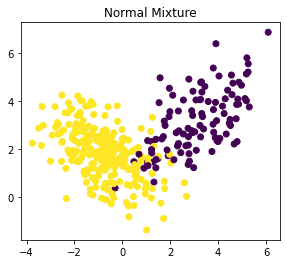

In [303]:
# Import the pyplot module of matplotlib.
# This is the most important module
import matplotlib.pyplot as plt

# create figure and axis object
fig, ax = plt.subplots()
# c stands for color-code.
ax.scatter(x=sample[:,0], y=sample[:,1], c=selected_norm)
# We can specify many other options
ax.set_aspect('equal')
# the "_ =" is there to avoid an unwanted print by Jupyter notebook
# this is more of jupyter problem than a matplotlib syntax.
# you can safely remove it if you prefer
_ = ax.set_title("Normal Mixture")

Now we proceed with the inference task we started, using the formula above. The strategy is to define a function, `which_norm()` returning the probability of the two normal distribution for a given data point. Then, we will calculate the probability of every row from `sample` using `np.apply_along_axis()`.

In [ ]:
# Implement the formula above in a function
def which_norm(samp, mvnorm_0, mvnorm_1, prior=[0.5, 0.5]):
    '''
        Implement Bayes rule to calculate the probability that samp was generated by the multivariate normals
    mvnorm_0 and mvnorm_1.

    :param samp: The data point as a np.array
    :param mvnorm_0: The first multivariate normal, a scipy.stats.multivariate_normal frozen distribution
    :param mvnorm_1: The second multivariate normal, a scipy.stats.multivariate_normal frozen distribution
    :param prior: Your prior belief about which mvn generated the datapoint. A vector or list
    :return: A np.array containing the probability of samp being generated by mvnorm_0 or mvnorm_1
    '''
    
    pdf_0 = mvnorm_0 # Get the pdf of the first mvnorm at samp. Use the .pdf() method #.pdf(samp)
    pdf_1 = mvnorm_1 # Get the pdf of the second mvnorm at samp. Use the .pdf() method #.pdf(samp)
    # Write the numerator from the formula above using the prior vector.
    numerator = np.array([pdf_0*# 
                          , pdf_1*#
                         ])
    denominator = numerator.sum()
    return numerator/denominator

# apply along axis
Ps = np.apply_along_axis(func1d=which_norm, 
                         arr=sample, 
                         # Which mvnorm should we pass?
                         mvnorm_0=# , 
                         mvnorm_1=# , 
                         # What is our prior? 
                         prior=# ,  
                         # What axis are we applying this to?
                         axis=# 
                        )
print(f"These are the first 10 inferred assignemnts:\n{np.round(Ps[:10,:],3)}\n")

# Extra:
# can you reproduce the plot above with the calculate probability (Ps) instead of the real values (selected_norm)?
# Hint: Check the c argument of ax.plot() or ax.scatter() from matplotlib
fig, ax = plt.subplots()
#ax.scatter()
ax.set_aspect('equal')
_ = ax.set_title("Normal Mixture Inference")